In [1]:
import torch 
from torchvision.io import read_video
import json 

In [15]:
one_person, *_ = read_video("/workspace/data/raw/run_1/FDR-AX60_1.mp4", output_format="TCHW", pts_unit="sec")
pt_info = torch.load("/workspace/data/pt/run_1/FDR-AX60_1.pt")
json_info = json.load(open("/workspace/data/json/run_1/FDR-AX60_1.json"))
print(one_person[0].shape)


torch.Size([3, 2160, 3840])


In [13]:
keypoint = torch.tensor(pt_info['keypoint']["keypoint"]) * torch.tensor(pt_info['img_shape'])
keypoint.shape

torch.Size([1, 360, 17, 2])

In [17]:
t, c, h, w = one_person.shape
_, kt, *_ = keypoint.shape

assert t == kt, "The number of frames in the video and keypoints do not match."


In [26]:
from torchvision.utils import draw_keypoints
from torchvision.transforms.functional import resize

res_frames = []
for f in range(t):

	res = draw_keypoints(one_person[f], keypoint[:, f, ...], radius=3)
	resized_res = resize(res, (h // 4, w // 4))
	res_frames.append(resized_res)

res_frames = torch.stack(res_frames)
print(res_frames.shape)
	

torch.Size([360, 3, 540, 960])


In [27]:
import cv2

# 假设 video_tensor: [T, H, W, C], uint8, RGB
T, C, H, W = res_frames.shape

out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (W, H))

for i in range(T):
    frame = res_frames[i].permute(1,2,0).numpy()
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    out.write(frame_bgr)

out.release()


In [28]:
# print(pt_info['video_name'])
# print(pt_info["video_path"])
# print(pt_info["img_shape"])
# print(pt_info["frame_count"])
# print(pt_info["none_index"])
# print(pt_info["bbox"])

In [39]:
keypoint[0][-1]

tensor([[2064.4983, 1896.1178],
        [2071.0652, 1848.9028],
        [2047.0844, 1863.4666],
        [   0.0000,    0.0000],
        [2012.8929, 1887.6318],
        [2101.7539, 2058.7795],
        [1986.0355, 2150.5034],
        [   0.0000,    0.0000],
        [1958.6379, 2437.2507],
        [   0.0000,    0.0000],
        [1963.3080, 2729.1440],
        [2131.3755, 2702.2122],
        [2059.5295, 2770.0762],
        [   0.0000,    0.0000],
        [2107.0745, 3177.5217],
        [   0.0000,    0.0000],
        [   0.0000,    0.0000]])

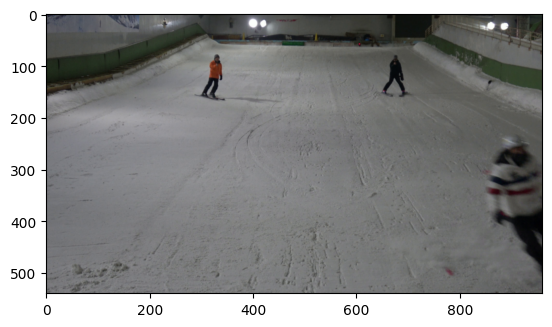

In [31]:
import matplotlib.pyplot as plt

plt.imshow(res_frames[-1].permute(1, 2, 0).numpy())